Student ID: 6422706H

Name: Nursharinah Binte Sohaimi

Module: ITI103 Essential of Machine Learning

Machine Learning assignment: Revolutionizing Real Estate: A Machine Learning Approach to Predict House Prices

## 1. Machine Learning problem formulation

### Framing a ML Problem

We want the ML model to predict house prices from features listed within the house_pricing.xls (given dataset).

The given dataset consists of 1,460 entries on various real estates information being documentated and provided by HousePricePredict Inc.

**Problem type:** Multivariate Regression.

(a method of modeling one variable in a prediction of multiple other variables, or want to quantify the numerical relationship between them. variables want to predict are continuous)

**Type of ML:** Supervised

**Initial modelling task:** Use simple linear regression model. To provide a good baseline to justify if more complex model is required. (A good rule of thumb: >1,000 samples for basic linear models)

*Note: Dataset's column descriptions can be found in data_description.txt*

**Target Variable (label):**
* SalePrice

**Features:**
*   MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition.


## 2. Data Exploration and Understanding

In [1]:
# @title

# plot graphs to know about the data, do EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('house_pricing.csv')
#data.head()
#data.tail()
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Determine shape of dataset, datatype, and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#View print out the following information regarding the data df.

print ("Rows     : ",data.shape[0] )
print ("Columns  : " ,data.shape[1])
print ("Missing values : ",data.isnull().sum().values.sum())

Rows     :  1460
Columns  :  81
Missing values :  7829


In [6]:
# Check the sample size
print('>>> Check the sample size:')
print(data.shape)

# Check the features
print( '>>> Check for the features: ')
print(data.describe())
#print(data.describe(include=[np.number]))

>>> Check the sample size:
(1460, 81)
>>> Check for the features: 
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std     

In [7]:
# @title
#import seaborn as sns
#import matplotlib.pyplot as plt

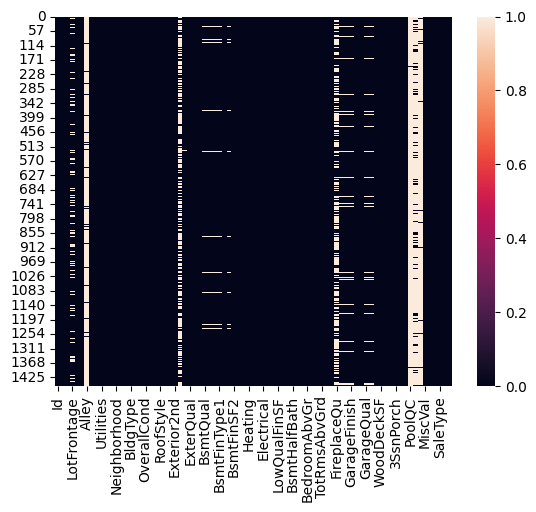

In [8]:
# Find where the missing values are located
sns.heatmap(data.isnull());
#data.isnull().sum()

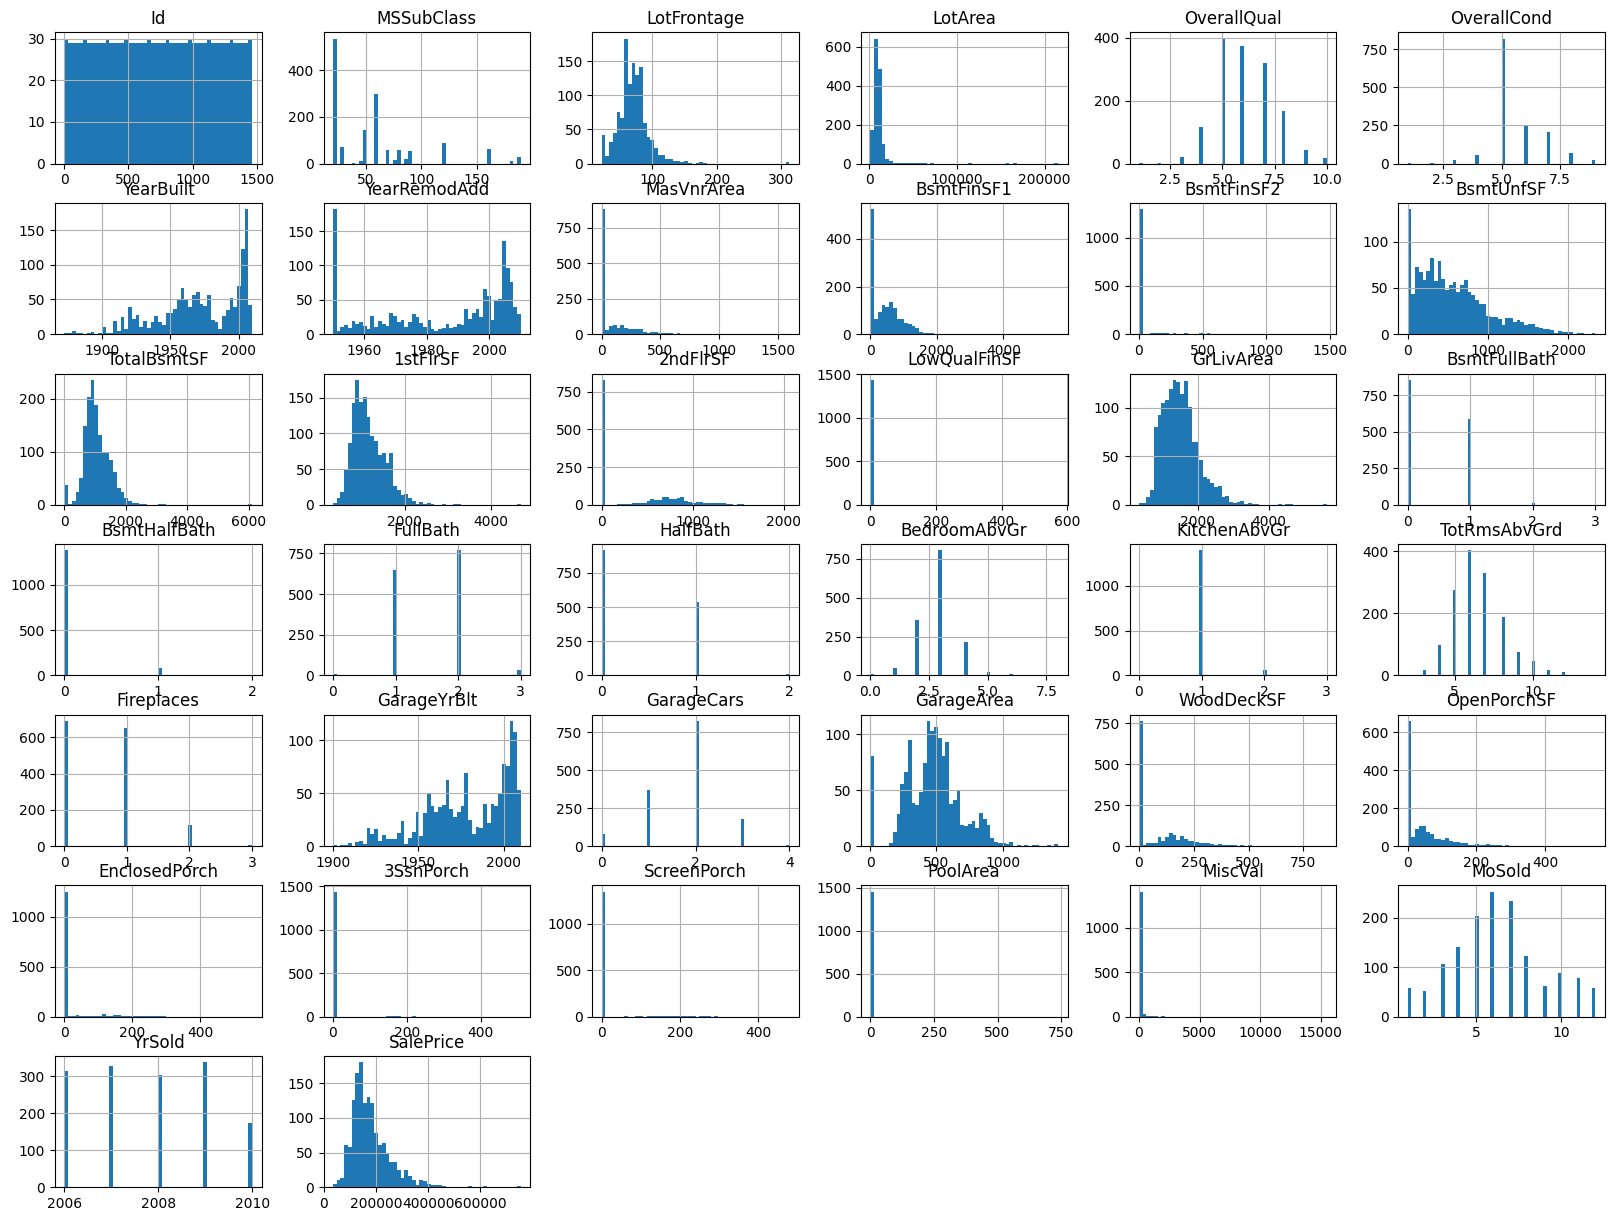

In [9]:
# Creates a histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

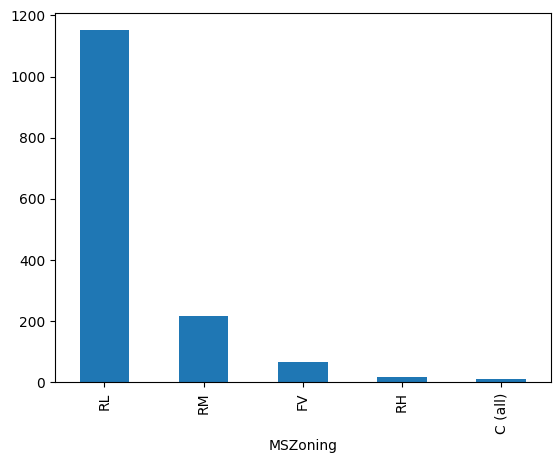

In [10]:
# count plot using matplotlib

data['MSZoning'].value_counts().plot(kind='bar')
plt.show()

Note:

*   RL - Residential Low Density
*   RM - Residential Medium Density
*   FV - Floating Village Residential
*   RH - Residential High Density
*   C - Commercial



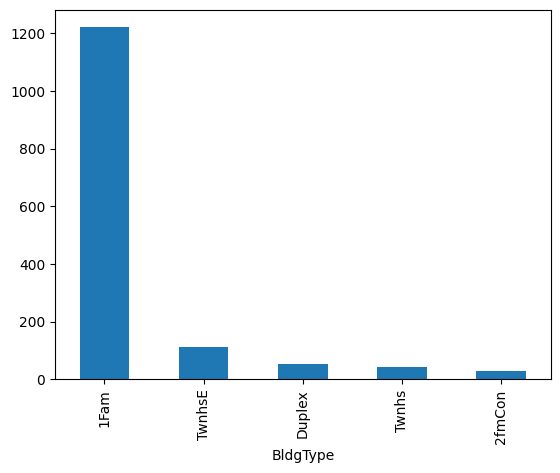

In [11]:
data['BldgType'].value_counts().plot(kind='bar')
plt.show()

Note:

*   1Fam - Single-family Detached
*   2FmCon - Two-family Conversion; originally built as one-family
*   Duplx - Duplex
*   TwnhsE - Townhouse End Unit
*   TwnhsI - Townhouse Inside Unit



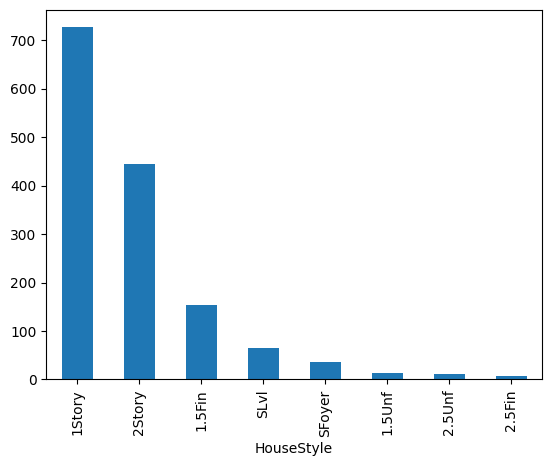

In [12]:
data['HouseStyle'].value_counts().plot(kind='bar')
plt.show()

Note:

*   1Story - One story
*   1.5Fin - One and one-half story: 2nd level finished
*   1.5Unf - One and one-half story: 2nd level unfinished
*   2Story - Two story
*   2.5Fin - Two and one-half story: 2nd level finished
*   2.5Unf - Two and one-half story: 2nd level unfinished
*   SFoyer - Split Foyer
*   SLvl - Split Level



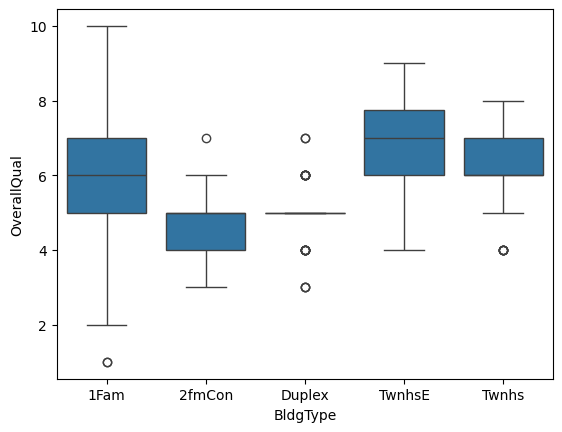

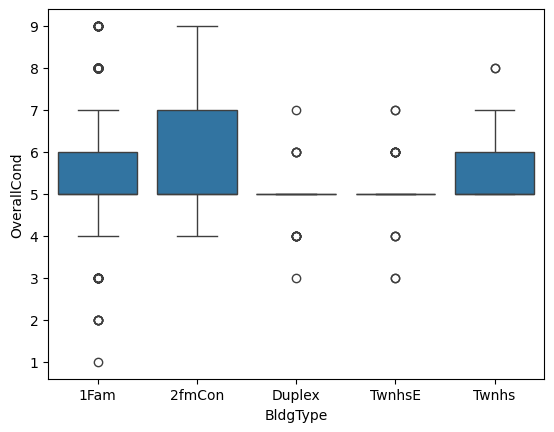

In [13]:
# box plot using sns for BldgType

sns.boxplot(x='BldgType', y='OverallQual', data=data)
plt.show()
sns.boxplot(x='BldgType', y='OverallCond', data=data)
plt.show()

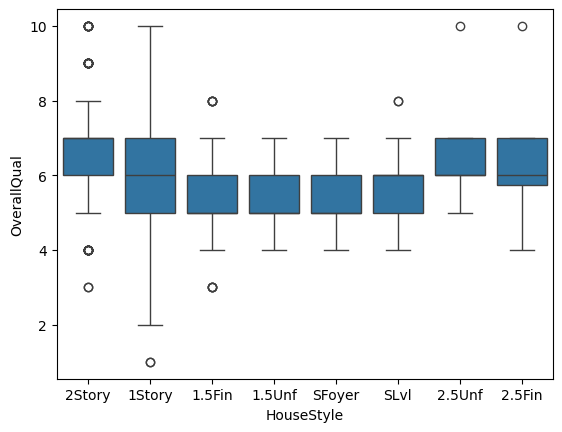

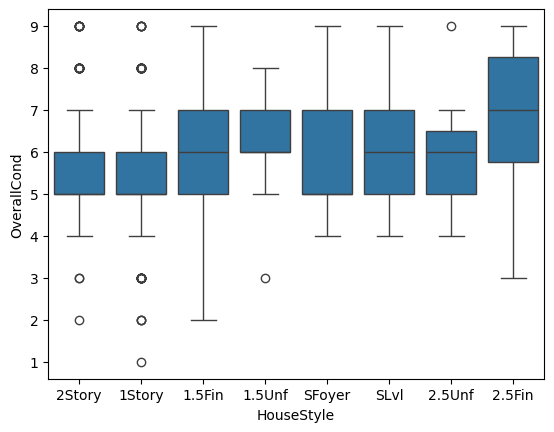

In [14]:
# box plot using sns for HouseStyle

sns.boxplot(x='HouseStyle', y='OverallQual', data=data)
plt.show()
sns.boxplot(x='HouseStyle', y='OverallCond', data=data)
plt.show()

In [15]:
#corr_matrix = data.corr(numeric_only=True)
#corr_matrix['SalePrice'].sort_values(ascending=False)

# Correlation matrix for numeric columns
#numeric_data = data.select_dtypes(include=[np.number])
#numeric_corr_matrix = numeric_data.corr()

# Display correlation matrix for numeric columns
#print(numeric_corr_matrix)

# Correlation matrix for numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation of 'SalePrice' with other numeric columns
#saleprice_corr = numeric_data.corr()['SalePrice'].sort_values(ascending=False)
saleprice_corr = numeric_data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

# Display correlation values for 'SalePrice'
print(saleprice_corr)

               SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907


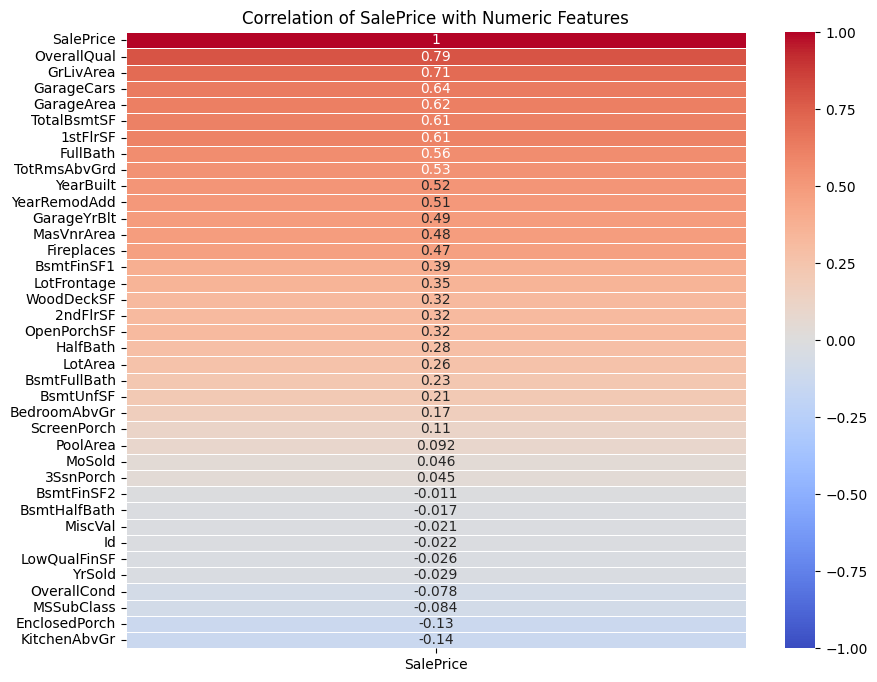

In [16]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(saleprice_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, linewidths=.5)
plt.title('Correlation of SalePrice with Numeric Features')
plt.show()

## 3. Data Preparation including feature engineering

In [17]:
# @title
# do data cleaning

In [18]:
# Drop columns due to high null values
data_clean = data.copy()
data_clean = data_clean.drop(columns=["Alley","FireplaceQu","Fence","MasVnrType","PoolQC","MiscFeature"])


In [19]:
#View print out the following information regarding the data_clean df.

print ("Rows     : ",data_clean.shape[0] )
print ("Columns  : " ,data_clean.shape[1])
print ("Missing values : ",data_clean.isnull().sum().values.sum())

Rows     :  1460
Columns  :  75
Missing values :  860


In [20]:
# Add a new column 'TotalSF'
data_clean['TotalSF'] = data_clean['1stFlrSF'] + data_clean['2ndFlrSF'] + data_clean['TotalBsmtSF']
data_clean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,2600
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,3615
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,3492
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,2156


In [21]:
# Feature Extraction
data_extract = data_clean.copy()
data_extract = data_extract[["MSZoning", "LotArea", "LandSlope", "Utilities", "LotConfig", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Heating", "HeatingQC", "CentralAir", "Electrical", "GrLivArea", "TotRmsAbvGrd", "Fireplaces", "GarageType", "GarageYrBlt", "GarageArea", "GarageCars", "TotalSF", "YrSold", "SalePrice"]]
data_extract.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   LandSlope     1460 non-null   object 
 3   Utilities     1460 non-null   object 
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  Heating       1460 non-null   object 
 12  HeatingQC     1460 non-null   object 
 13  CentralAir    1460 non-null   object 
 14  Electrical    1459 non-null   object 
 15  GrLivArea     1460 non-null   int64  
 16  TotRmsAbvGrd  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageType    1379 non-null 

In [22]:
#View print out the following information regarding the data_clean df.

print ("Rows     : ",data_extract.shape[0] )
print ("Columns  : " ,data_extract.shape[1])
print ("Missing values : ",data_extract.isnull().sum().values.sum())

Rows     :  1460
Columns  :  25
Missing values :  163


In [23]:
# Drop any rows where 'Electrical' column has null values
data_extract = data_extract.dropna(subset=["Electrical"])

In [24]:
# Change datatype of 'GarageYrBlt' to integer and replace NaN with 0
data_extract['GarageYrBlt'] = data_extract['GarageYrBlt'].fillna(0).astype(int)

# Display the modified 'GarageYrBlt' values
#garage_yr_built_values = data_extract['GarageYrBlt'].unique()
#print(garage_yr_built_values)

In [25]:
# Change NaN values in 'GarageType' to 'NA'
data_extract['GarageType'] = data_extract['GarageType'].fillna('NA')

# Display unique values in the 'GarageType' column
#garage_type_values = data_extract['GarageType'].unique()
#print(garage_type_values)

In [26]:
data_extract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1459 non-null   object
 1   LotArea       1459 non-null   int64 
 2   LandSlope     1459 non-null   object
 3   Utilities     1459 non-null   object
 4   LotConfig     1459 non-null   object
 5   BldgType      1459 non-null   object
 6   HouseStyle    1459 non-null   object
 7   OverallQual   1459 non-null   int64 
 8   OverallCond   1459 non-null   int64 
 9   YearBuilt     1459 non-null   int64 
 10  YearRemodAdd  1459 non-null   int64 
 11  Heating       1459 non-null   object
 12  HeatingQC     1459 non-null   object
 13  CentralAir    1459 non-null   object
 14  Electrical    1459 non-null   object
 15  GrLivArea     1459 non-null   int64 
 16  TotRmsAbvGrd  1459 non-null   int64 
 17  Fireplaces    1459 non-null   int64 
 18  GarageType    1459 non-null   object
 19  GarageYrBlt

In [27]:
# Update indexing for rows in the data_extract df
data_extract.reset_index(drop=True, inplace=True)
data_extract


,MSZoning,LotArea,LandSlope,Utilities,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageArea,GarageCars,TotalSF,YrSold,SalePrice
0,RL,8450,Gtl,AllPub,Inside,1Fam,2Story,7,5,2003,...,1710,8,0,Attchd,2003,548,2,2566,2008,208500
1,RL,9600,Gtl,AllPub,FR2,1Fam,1Story,6,8,1976,...,1262,6,1,Attchd,1976,460,2,2524,2007,181500
2,RL,11250,Gtl,AllPub,Inside,1Fam,2Story,7,5,2001,...,1786,6,1,Attchd,2001,608,2,2706,2008,223500
3,RL,9550,Gtl,AllPub,Corner,1Fam,2Story,7,5,1915,...,1717,7,1,Detchd,1998,642,3,2473,2006,140000
4,RL,14260,Gtl,AllPub,FR2,1Fam,2Story,8,5,2000,...,2198,9,1,Attchd,2000,836,3,3343,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RL,7917,Gtl,AllPub,Inside,1Fam,2Story,6,5,1999,...,1647,7,1,Attchd,1999,460,2,2600,2007,175000
1455,RL,13175,Gtl,AllPub,Inside,1Fam,1Story,6,6,1978,...,2073,7,2,Attchd,1978,500,2,3615,2010,210000
1456,RL,9042,Gtl,AllPub,Inside,1Fam,2Story,7,9,1941,...,2340,9,2,Attchd,1941,252,1,3492,2010,266500
1457,RL,9717,Gtl,AllPub,Inside,1Fam,1Story,5,6,1950,...,1078,5,0,Attchd,1950,240,1,2156,2010,142125


In [28]:
# Check the sample size
print('>>> Check the sample size:')
print(data_extract.shape)

# Check the features
print( '>>> Check for the features: ')
print(data_extract.describe())

>>> Check the sample size:
(1459, 25)
>>> Check for the features: 
             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   
mean    10517.363948     6.100069     5.575737  1971.244003   1984.850583   
std      9984.666267     1.383171     1.113079    30.199555     20.644343   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7549.000000     5.000000     5.000000  1954.000000   1967.000000   
50%      9477.000000     6.000000     5.000000  1973.000000   1994.000000   
75%     11603.000000     7.000000     6.000000  2000.000000   2004.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

         GrLivArea  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageArea  \
count  1459.000000   1459.000000  1459.000000  1459.000000  1459.000000   
mean   1515.546950      6.517478     0.613434  1868.644962   473.030158   
std     525.65

In [29]:
data_encoded = data_extract.copy()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store label encoders for each column
label_encoders = {}

# Encode categorical columns and store the label encoders
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])
        label_encoders[col] = le

# Display the encoded DataFrame
print(data_encoded)

      MSZoning  LotArea  LandSlope  Utilities  LotConfig  BldgType  \
0            3     8450          0          0          4         0   
1            3     9600          0          0          2         0   
2            3    11250          0          0          4         0   
3            3     9550          0          0          0         0   
4            3    14260          0          0          2         0   
...        ...      ...        ...        ...        ...       ...   
1454         3     7917          0          0          4         0   
1455         3    13175          0          0          4         0   
1456         3     9042          0          0          4         0   
1457         3     9717          0          0          4         0   
1458         3     9937          0          0          4         0   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GrLivArea  \
0              5            7            5       2003  ...       1710   
1            

In [31]:
# Display the label encoding mapping for each column
for col, le in label_encoders.items():
    print(f"\nMapping for {col}:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))


Mapping for MSZoning:
{'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}

Mapping for LandSlope:
{'Gtl': 0, 'Mod': 1, 'Sev': 2}

Mapping for Utilities:
{'AllPub': 0, 'NoSeWa': 1}

Mapping for LotConfig:
{'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}

Mapping for BldgType:
{'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}

Mapping for HouseStyle:
{'1.5Fin': 0, '1.5Unf': 1, '1Story': 2, '2.5Fin': 3, '2.5Unf': 4, '2Story': 5, 'SFoyer': 6, 'SLvl': 7}

Mapping for Heating:
{'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 4, 'Wall': 5}

Mapping for HeatingQC:
{'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}

Mapping for CentralAir:
{'N': 0, 'Y': 1}

Mapping for Electrical:
{'FuseA': 0, 'FuseF': 1, 'FuseP': 2, 'Mix': 3, 'SBrkr': 4}

Mapping for GarageType:
{'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'NA': 6}


In [32]:
data_encoded

,MSZoning,LotArea,LandSlope,Utilities,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageArea,GarageCars,TotalSF,YrSold,SalePrice
0,3,8450,0,0,4,0,5,7,5,2003,...,1710,8,0,1,2003,548,2,2566,2008,208500
1,3,9600,0,0,2,0,2,6,8,1976,...,1262,6,1,1,1976,460,2,2524,2007,181500
2,3,11250,0,0,4,0,5,7,5,2001,...,1786,6,1,1,2001,608,2,2706,2008,223500
3,3,9550,0,0,0,0,5,7,5,1915,...,1717,7,1,5,1998,642,3,2473,2006,140000
4,3,14260,0,0,2,0,5,8,5,2000,...,2198,9,1,1,2000,836,3,3343,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,7917,0,0,4,0,5,6,5,1999,...,1647,7,1,1,1999,460,2,2600,2007,175000
1455,3,13175,0,0,4,0,2,6,6,1978,...,2073,7,2,1,1978,500,2,3615,2010,210000
1456,3,9042,0,0,4,0,5,7,9,1941,...,2340,9,2,1,1941,252,1,3492,2010,266500
1457,3,9717,0,0,4,0,2,5,6,1950,...,1078,5,0,1,1950,240,1,2156,2010,142125


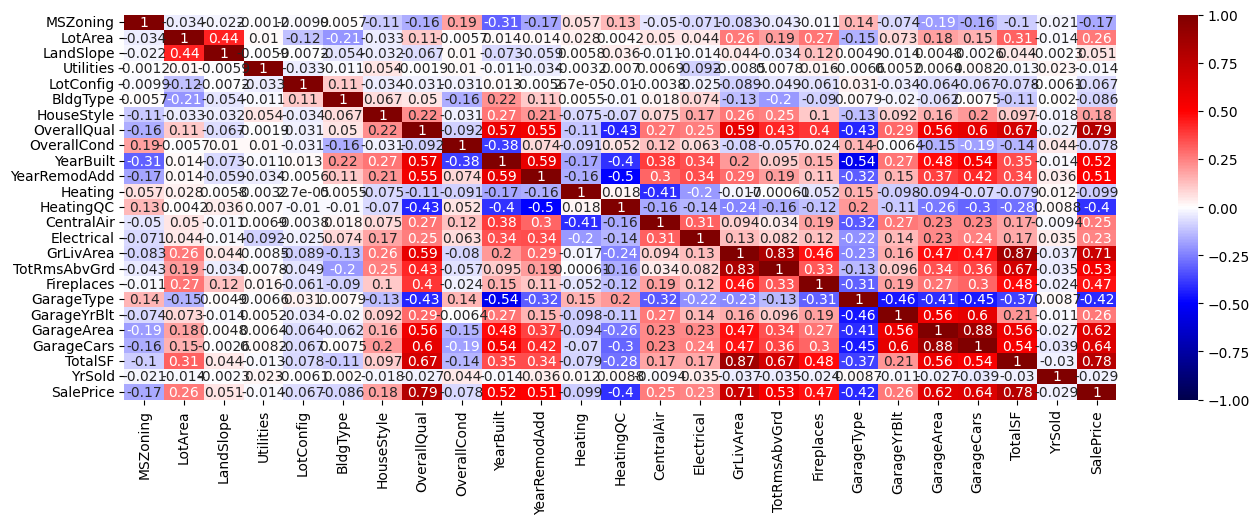

In [33]:
# Correlation Matrix using seaborn heatmap for a better view
plt.figure(figsize = (16,5))

sns.heatmap(data_encoded.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

## 4. Model Selection

In [34]:
# @title
# use at least 4 models. choose suitable models based on the problem

# Performance Measurement
# not really focused on the marks here.
# i.e. not really concern if accuracy can hit above 80/90. 60 is acceptable
# regression metrics: MSE, MAE
# classification metrics: accuracy, precision, recall
# state appropriate justification of metrices to check as due to what ML problem you are solving thus only focus on those related

In [35]:
ML = data_encoded.copy()

In [36]:
ML.YrSold.value_counts().sort_index()

YrSold
2006    314
2007    329
2008    303
2009    338
2010    175
Name: count, dtype: int64

In [37]:
# Using Stratified Sampling for Train & Test sets with 70/30 ratio
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

strat_train, strat_test = train_test_split(ML, test_size=0.3, shuffle=True, stratify=ML['YrSold'])
print(len(strat_train), 'train', len(strat_test), 'test')

1021 train 438 test


In [38]:
# Create a validation test set by splitting the data into 70/30
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(ML, test_size = 0.3, random_state=7)

# take all the columns except SalePrice as features
X = strat_train.drop(['SalePrice'],axis=1).values
# take last SalePrice as target label
Y = strat_train['SalePrice'].values
x_test = strat_test.drop(['SalePrice'],axis=1).values
y_test = strat_test['SalePrice'].values

In [39]:
X

array([[    3,  9842,     0, ...,     2,  3213,  2008],
       [    3,  8120,     0, ...,     2,  1728,  2009],
       [    3, 11362,     0, ...,     3,  3672,  2009],
       ...,
       [    1, 10207,     0, ...,     2,  2635,  2007],
       [    3, 10357,     0, ...,     2,  2352,  2007],
       [    3, 12803,     0, ...,     2,  2988,  2008]])

In [40]:
Y

array([189000, 124500, 280000, ..., 227875, 179900, 221000])

### Model 1: Linear Regression & Performance Measurement

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define the pipeline
LinR_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('Lin_Reg', LinearRegression()),
    ])

# Fit the pipeline
LinR_model = LinR_pipeline.fit(X,Y)



# predictions on a small subset of data
#some_data = x_test.iloc[:5]
#some_labels = y_test.iloc[:5]
#some_data_prep = LinR_pipeline.transform(some_data)

#print("Predictions:", LinR_pipeline.predict(some_data_prep))
#print("Labels:", list(some_labels))

In [42]:
# Lin_Reg - Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error

# Make predictions on test set
Y_pred = LinR_model.predict(x_test)
lin_mse = mean_squared_error(y_test, Y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

41269.54880421299

In [43]:
# Lin_Reg - Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

Y_pred = LinR_model.predict(x_test)
lin_mae = mean_absolute_error(y_test, Y_pred)
lin_mae

22592.054339697166

### Model 2: Decision Tree & Performance Measurement

In [44]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Define the pipeline
DTree_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('DT_Reg', DecisionTreeRegressor(random_state=42)),
    ])

# Fit the pipeline
DTree_model = DTree_pipeline.fit(X,Y)

In [45]:
# DT_Reg - Root Mean Square Error (RMSE)
#from sklearn.metrics import mean_squared_error

# Make predictions on test set
Y_pred = DTree_model.predict(x_test)
DT_mse = mean_squared_error(y_test, Y_pred)
DT_rmse = np.sqrt(DT_mse)
DT_rmse

51100.20746618117

In [46]:
# DT_Reg - Mean Absolute Error (MAE)
#from sklearn.metrics import mean_absolute_error

Y_pred = DTree_model.predict(x_test)
DT_mae = mean_absolute_error(y_test, Y_pred)
DT_mae

27018.88584474886

### Model 3: Random Forest & Performance Measurement

In [47]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Define the pipeline
RForest_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('RF_Reg', RandomForestRegressor(n_estimators=30)),
    ])

# Fit the pipeline
RForest_model = RForest_pipeline.fit(X,Y)

In [48]:
# RF_Reg - Root Mean Square Error (RMSE)
#from sklearn.metrics import mean_squared_error

# Make predictions on test set
Y_pred = RForest_model.predict(x_test)
RF_mse = mean_squared_error(y_test, Y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

35415.29670185713

In [49]:
# RF_Reg - Mean Absolute Error (MAE)
#from sklearn.metrics import mean_absolute_error

Y_pred = RForest_model.predict(x_test)
RF_mae = mean_absolute_error(y_test, Y_pred)
RF_mae

19445.448604769153

### Model 4: Partial Least Square Regression (PLSR) & Performance Measurement

In [50]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

# Define the pipeline
PSLR_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('PLS_Reg', PLSRegression(n_components=10)),
    ])

# Fit the pipeline
PSLR_model = PSLR_pipeline.fit(X,Y)

In [51]:
# PLS_Reg - Root Mean Square Error (RMSE)
#from sklearn.metrics import mean_squared_error

# Make predictions on test set
Y_pred = PSLR_model.predict(x_test)
PSLR_mse = mean_squared_error(y_test, Y_pred)
PSLR_rmse = np.sqrt(PSLR_mse)
PSLR_rmse

41189.37202293779

In [52]:
# PLS_Reg - Mean Absolute Error (MAE)
#from sklearn.metrics import mean_absolute_error

Y_pred = PSLR_model.predict(x_test)
PSLR_mae = mean_absolute_error(y_test, Y_pred)
PSLR_mae

22540.736566018695

In [53]:
# @title Summary Performance Measurement
# not really focused on the marks here.
# i.e. not really concern if accuracy can hit above 80/90. 60 is acceptable
# regression metrics: MSE, MAE
# classification metrics: accuracy, precision, recall
# state appropriate justification of metrices to check as due to what ML problem you are solving thus only focus on those related

In [54]:
# Create a dictionary with the stored variables
data = {
    'Model': ['LinR_model', 'DTree_model', 'RForest_model', 'PSLR_model'],
    'RMSE': [lin_rmse, DT_rmse, RF_rmse, PSLR_rmse],
    'MAE': [lin_mae, DT_mae, RF_mae, PSLR_mae]
}

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(data)

# Display the DataFrame
#print(df_results)
df_results

,Model,RMSE,MAE
0,LinR_model,41269.548804,22592.054340
1,DTree_model,51100.207466,27018.885845
2,RForest_model,35415.296702,19445.448605
3,PSLR_model,41189.372023,22540.736566


## 5. Hyperparameter Tuning

In [55]:
# @title
# covered a little in lectures

In [56]:
# Evaluation using Cross Validation to split training set into 5 distinct folds and evaluate the model 5 times
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RForest_model, x_test, y_test, scoring="neg_mean_squared_error", cv=5)
print(scores)
RF_rmse_scores = np.sqrt(-scores)
print(RF_rmse_scores)
display_scores(RF_rmse_scores)

[-2.62018487e+09 -6.83501435e+08 -1.79087720e+09 -5.19314143e+08
 -4.53283463e+08]
[51187.74138301 26143.86036937 42318.75709956 22788.46512758
 21290.4547321 ]
Scores: [51187.74138301 26143.86036937 42318.75709956 22788.46512758
 21290.4547321 ]
Mean: 32745.855742322823
Standard deviation: 11880.28425117555


In [58]:
lin_scores = cross_val_score(LinR_model, x_test, y_test, scoring="neg_mean_squared_error", cv=5)
print(lin_scores)
LR_rmse_scores = np.sqrt(-lin_scores)
print(LR_rmse_scores)
display_scores(LR_rmse_scores)

[-5.09940322e+09 -9.91666252e+08 -2.02565071e+09 -7.87569049e+08
 -6.73078897e+08]
[71410.10588413 31490.73279022 45007.22955977 28063.660652
 25943.76412656]
Scores: [71410.10588413 31490.73279022 45007.22955977 28063.660652
 25943.76412656]
Mean: 40383.09860253604
Standard deviation: 16872.432363045948


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

housing_num = strat_train.drop('SalePrice', axis=1)

num_attribs = list(housing_num)
cat_attribs = ["SalePrice"]

full_pipeline = ColumnTransformer([
        ("num", RForest_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prep = full_pipeline.fit_transform(X)

TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. 'Pipeline(steps=[('std_scaler', StandardScaler()),
                ('RF_Reg', RandomForestRegressor(n_estimators=30))])' (type <class 'sklearn.pipeline.Pipeline'>) doesn't.

In [60]:
# Evaluate System on the Test Set

fin_model = RForest_model

X_test = strat_test.drop('SalePrice',axis=1)
y_test = strat_test["SalePrice"].copy()

X_test_prep = full_pipeline.transform(X_test)
fin_predict = fin_model.predict(X_test_prep)

fin_mse = mean_squared_error(y_test, fin_predict)
fin_mse = np.sqrt(fin_mse)
fin_mse

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 6. Extra feature and consideration

In [ ]:
# @title
# did not cover at all. maybe can focus on consideration of ethical implications
# e.g. if happy with model deployment, can talk about its implications

This section discusses the potential data science ethics issues: privacy, fairness, accuracy, accountability, and transparency in the project.



1.   **Privacy:** *data privacy includes Personal Data Protection Action (PDPA) in Singapore context, and General Data Protection Regularization (GDPR). In this project, the data does not contain sensitive information that violates from the two privacy laws previously mentioned.*

2.   **Fairness:** *this includes checking for bias and discriminatory outcomes from the deployed model. This is considered by performing stratified random sampling by YearSold attribute which generally has a balanced number of entries count for each year value.*

3.   **Accuracy:** *data accuracy refers to choosing appropriate models and trade accuracy for interpretability when required. Random Forest  model is the chosen model as it performs farily better than the others when compared to RMSE and MAE scores. Though it lacks the ease for interpretability since it is a black box algorithm.*

4.   **Accountability:** *this refers to creating AI Internal Governance Structure that has strong fundamental beliefs of a person or organisation. Its core value shall guide to distinguish between making the right and actions or decisions. This can be achieved through facilitating standardized and consistent processes to evaluate risk on the impact of AI solutions and provide greater control over the review process. Note that this should be done throughout the entire AI Project Life Cycle.*

5.   **Transparency:** *refers to allowing AI system's processes implemented to be trusted by stakeholders before it can be effectively deployed and used. As the chosen model is using Random Forest algorithm, the explanability on the rationale behind the model's predictions and decisions cannot be determine. Hence, with the modeling of Linear Regression (which uses a mathematical concept) as baseline can provide understanding of the model's suitability to meet the data mining and business objective goals.However, Random Forest can also display the 'Feature Importance' which is not explored yet but able to tell us which feature would affect the prediction of the Sale Price*



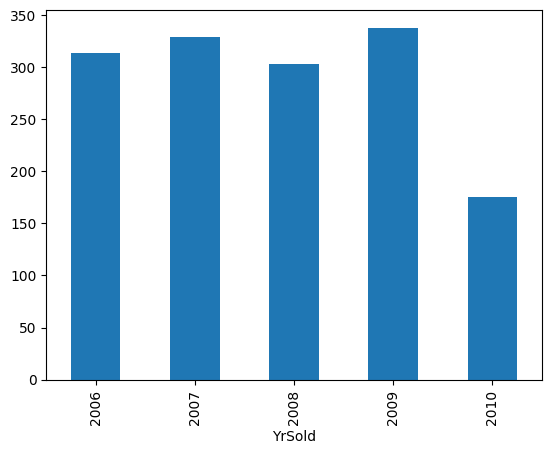

In [55]:
ML['YrSold'].value_counts().sort_index().plot(kind='bar')
plt.show()

## 7. Project Presentation (Video Recording)

Access link for Video Presentation:
https://drive.google.com/drive/folders/1Jcyc7i7IvFFIblszShFcanny3q1GzKEA?usp=sharing